<a href="https://colab.research.google.com/github/aryod24/DataMining/blob/main/uas2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K = 1, Akurasi = 0.3333333333333333
K = 2, Akurasi = 0.3333333333333333
K = 3, Akurasi = 0.0
K = 4, Akurasi = 0.0
K = 5, Akurasi = 0.6666666666666666
K = 6, Akurasi = 0.3333333333333333


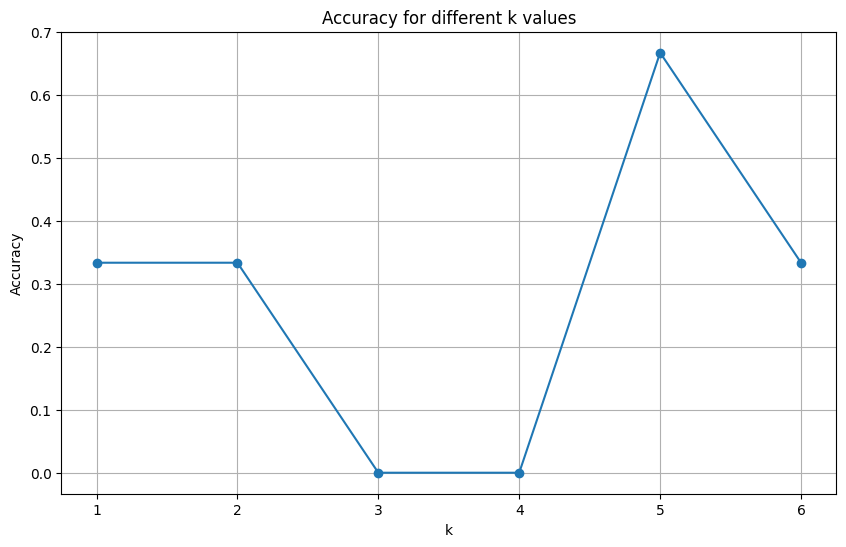

The optimal value of k is 5 with an accuracy of 0.67


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Prepare the data
data = {
    'A1': [4.9, 6.6, 5.7, 4.9, 5.4, 6.0, 6.8, 5.7, 6.4],
    'A2': [2.4, 2.9, 3.5, 3.1, 3.7, 2.2, 3.0, 2.5, 3.2],
    'A3': ['Ya', 'Ya', 'Ya', 'Ya', 'Tidak', 'Tidak', 'Tidak', 'Tidak', 'Ya'],
    'Jenis': ['Tropis', 'Tropis', 'Tropis', 'Non-Tropis', 'Non-Tropis', 'Non-Tropis', 'Kutub', 'Kutub', 'Kutub']
}

df = pd.DataFrame(data)

# Convert categorical data to numerical
df['A3'] = df['A3'].map({'Ya': 1, 'Tidak': 0})
df['Jenis'] = df['Jenis'].map({'Tropis': 0, 'Non-Tropis': 1, 'Kutub': 2})

# Define features and target
X = df[['A1', 'A2', 'A3']]
y = df['Jenis']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize lists to store k values and their corresponding accuracies
k_range = range(1, len(X_train) + 1)
accuracies = []

# Find the optimal k value
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"K = {k}, Akurasi = {accuracy}")

# Plot the accuracy for each k
plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracies, marker='o')
plt.title('Accuracy for different k values')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Find and print the optimal k
optimal_k = k_range[accuracies.index(max(accuracies))]
print(f"The optimal value of k is {optimal_k} with an accuracy of {max(accuracies):.2f}")